In [134]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, filters, io
from skimage.morphology import disk
from skimage import color

In [119]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

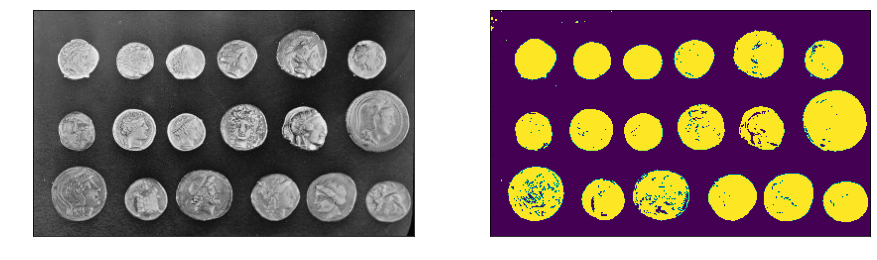

In [120]:
I = data.coins()
I = I[75:,:]
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
seg_I = I > 105
plt.imshow(seg_I)

Text(0, 0.5, 'Pixel count ')

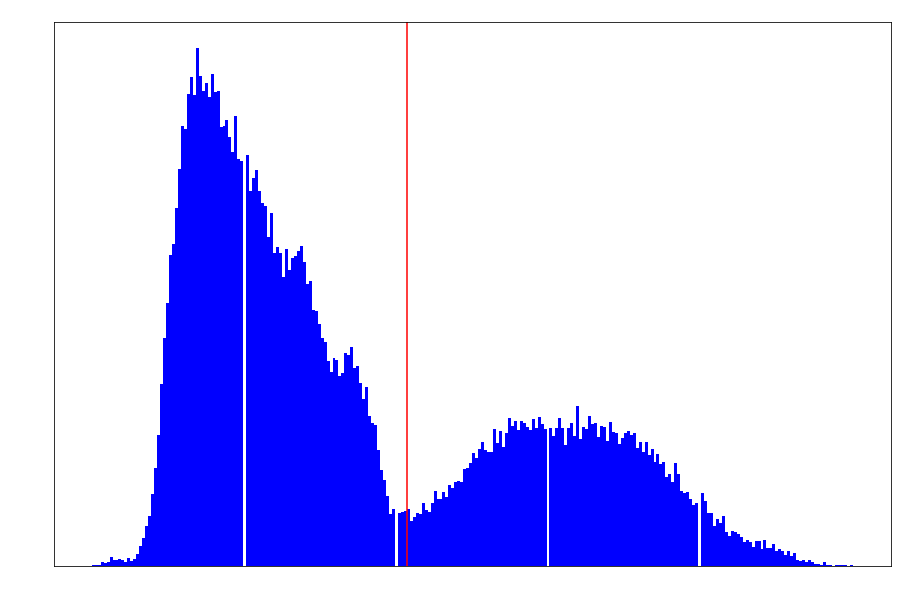

In [121]:
plt.figure(figsize=(15, 10))
ax1  = plt.subplot(111)
plt.hist(I.ravel(), bins=256, histtype='bar', color='blue')
ax1.axvline(105, color='r')

plt.title("Jasovy histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count ")

In [122]:
mean_object_intensity = np.mean(I[seg_I])
mean_background_intensity = np.mean(I[seg_I==0])

threshold = 120

In [123]:
counter = 0

while True:
    background  = I < threshold
    obj = I >= threshold

    mean_object_intensity = np.mean(I[obj])
    mean_background_intensity = np.mean(I[background])

    new_threshold = (mean_object_intensity + mean_background_intensity)/2
    #new_threshold = (mean_object_intensity*1.25 + mean_background_intensity*0.75)/2

    if np.abs(threshold - new_threshold) < 0.1:
        break
    counter = counter + 1
    threshold = new_threshold
print("Converged to optimal threshold in {} iteration with threshold: {}".format(counter,threshold))

Converged to optimal threshold in 3 iteration with threshold: 108.13560341311842


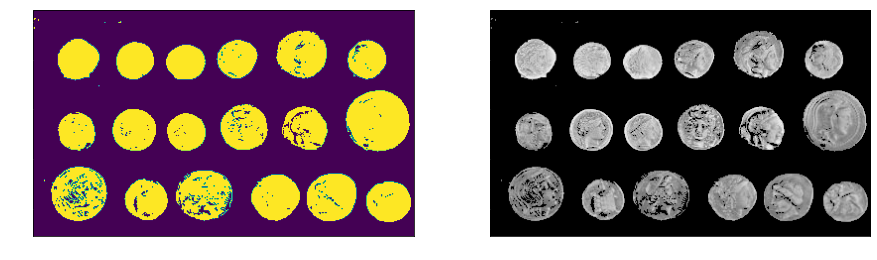

In [124]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I>threshold)
plt.subplot(122)
plt.imshow(I * (I>threshold),cmap='gray')

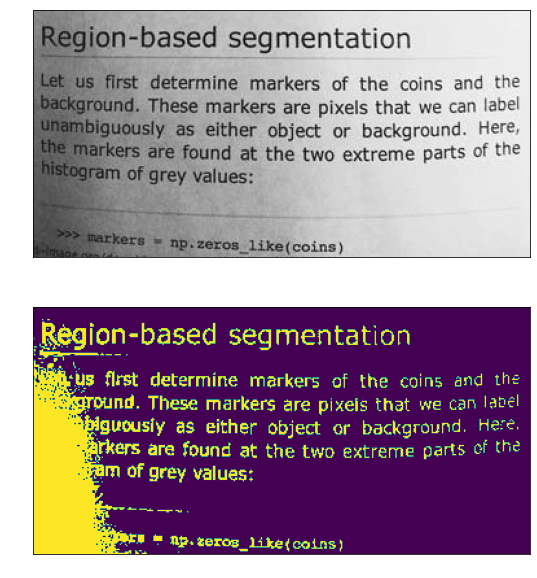

In [125]:
I2 = data.page()
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.imshow(I2,cmap='gray')
plt.subplot(212)
plt.imshow(I2<120)

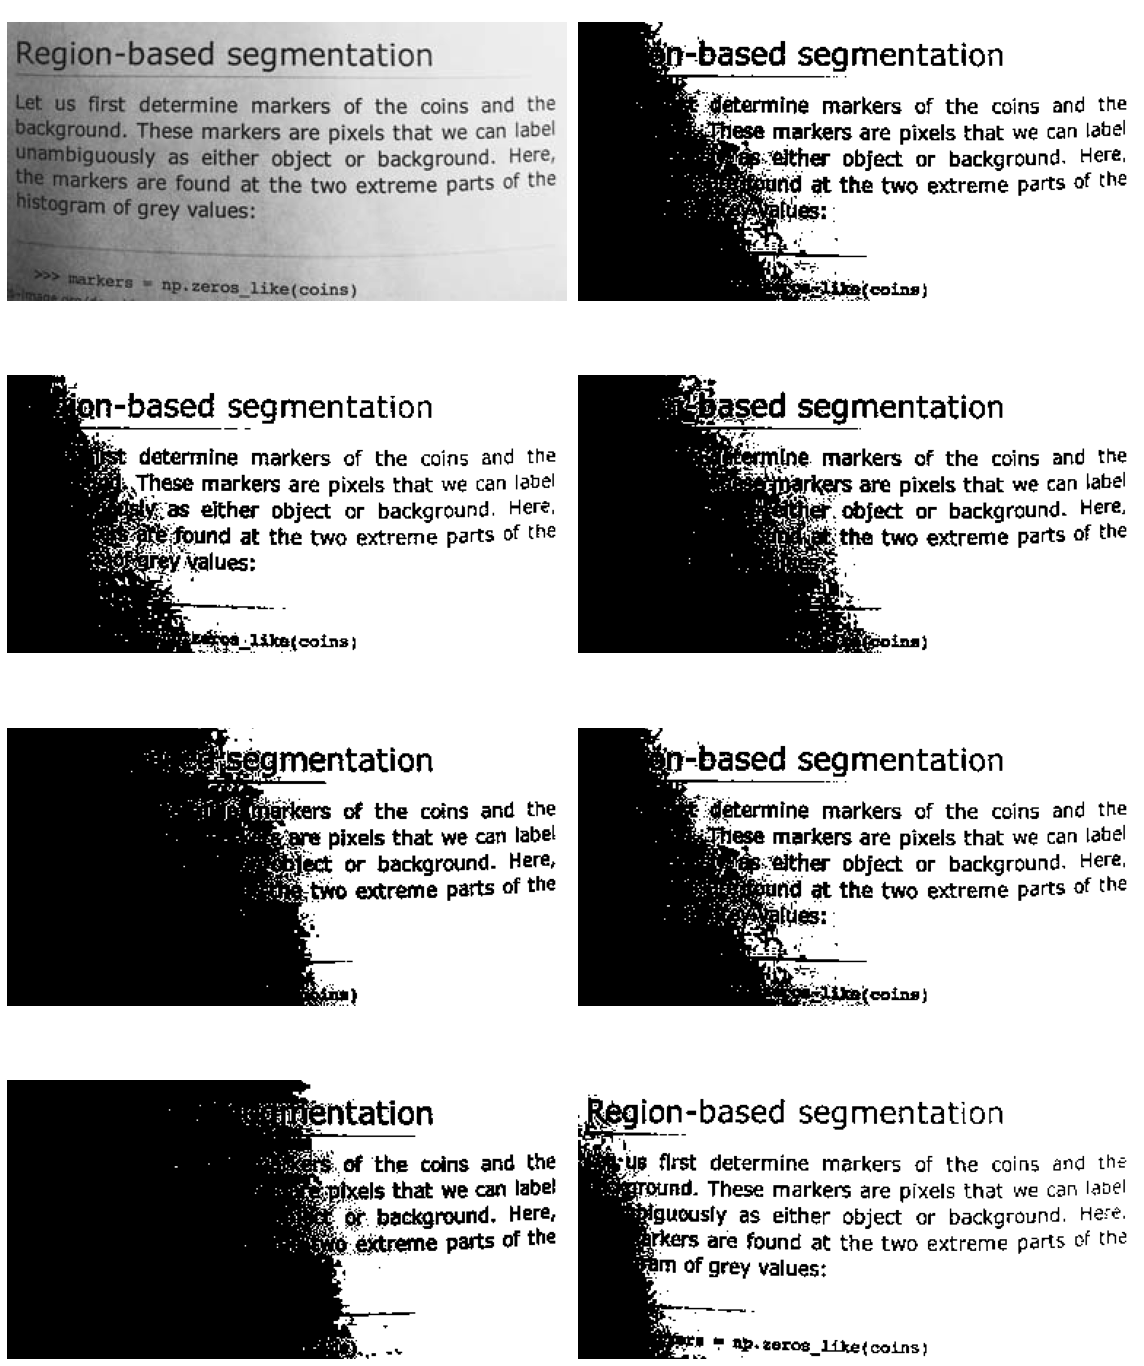

In [126]:
fig, ax = filters.try_all_threshold(I2, figsize=(16, 20), verbose=False)
plt.show()

E:\PV\lib\site-packages\IPython\core\interactiveshell.py:3418: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


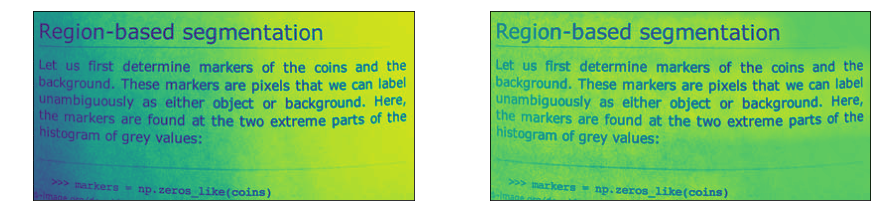

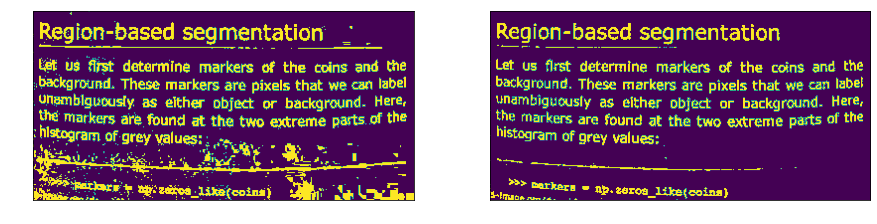

In [127]:
s_elem = disk(20)

I2_float = I2/255
I_filt  = filters.rank.mean(I2_float,selem=s_elem)/255
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I2_float)
plt.subplot(122)
plt.imshow((I2_float -I_filt))
im_t1 = (I2_float - I_filt) < 0.0
im_t2 = (I2_float - I_filt) < -0.05
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im_t1)
plt.subplot(122)
plt.imshow(im_t2)

Text(0.5, 1.0, 'B')

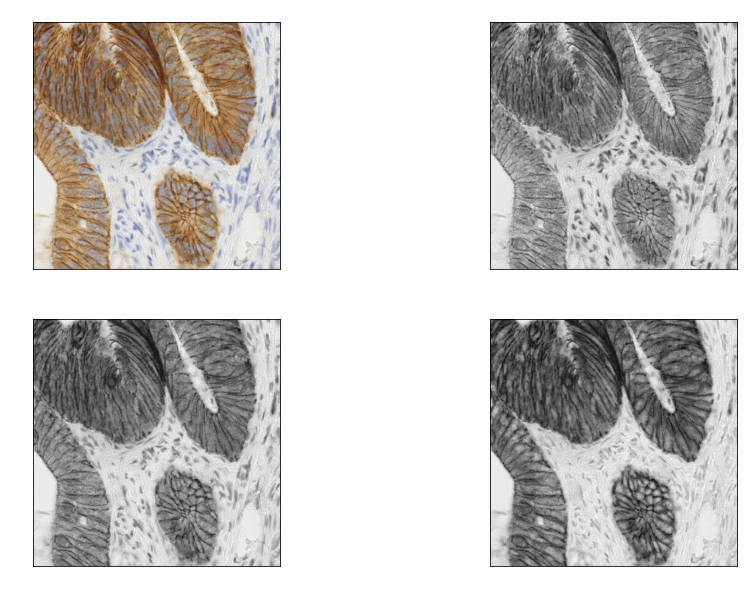

In [128]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3[:,:,0],cmap='gray')
plt.title('R')
plt.subplot(223)
plt.imshow(I3[:,:,1],cmap='gray')
plt.title('G')
plt.subplot(224)
plt.imshow(I3[:,:,2],cmap='gray')
plt.title('B')

Text(0.5, 1.0, 'Result mask')

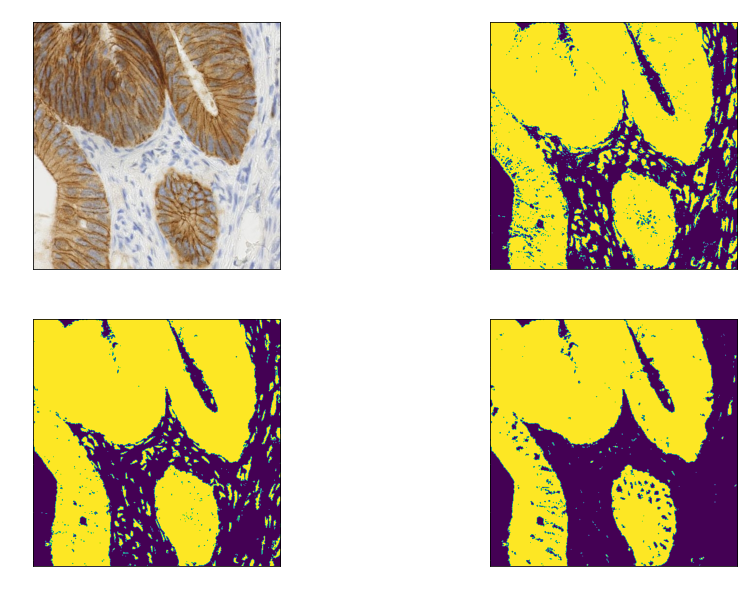

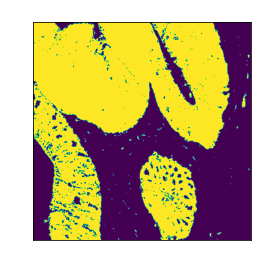

In [129]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(I3)

plt.subplot(222)
t_R =I3[:,:,0]<200
plt.imshow(t_R)
plt.title('R')

plt.subplot(223)
t_G = I3[:,:,1]<185
plt.imshow(t_G)
plt.title('G')

plt.subplot(224)
t_B = I3[:,:,2]<160
plt.imshow(t_B)
plt.title('B')


plt.figure()
mask = np.logical_and(np.logical_and(t_R,t_G),t_B)
plt.imshow(mask)
plt.title('Result mask')

Text(0.5, 1.0, 'b')

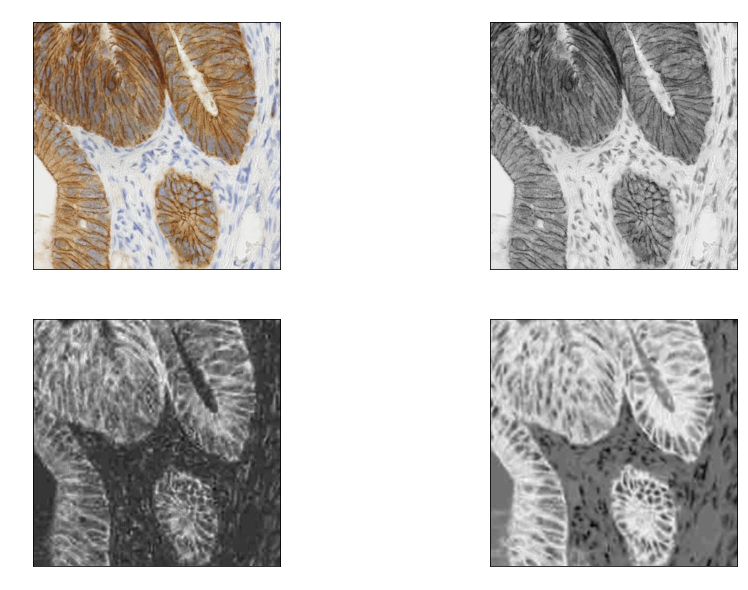

In [130]:
I3_lab = color.rgb2lab(I3)
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(I3)
plt.subplot(222)
plt.imshow(I3_lab[:,:,0],cmap='gray')
plt.title('L')
plt.subplot(223)
plt.imshow(I3_lab[:,:,1],cmap='gray')
plt.title('a')
plt.subplot(224)
plt.imshow(I3_lab[:,:,2],cmap='gray')
plt.title('b')

Text(0.5, 1.0, 'Cervene')

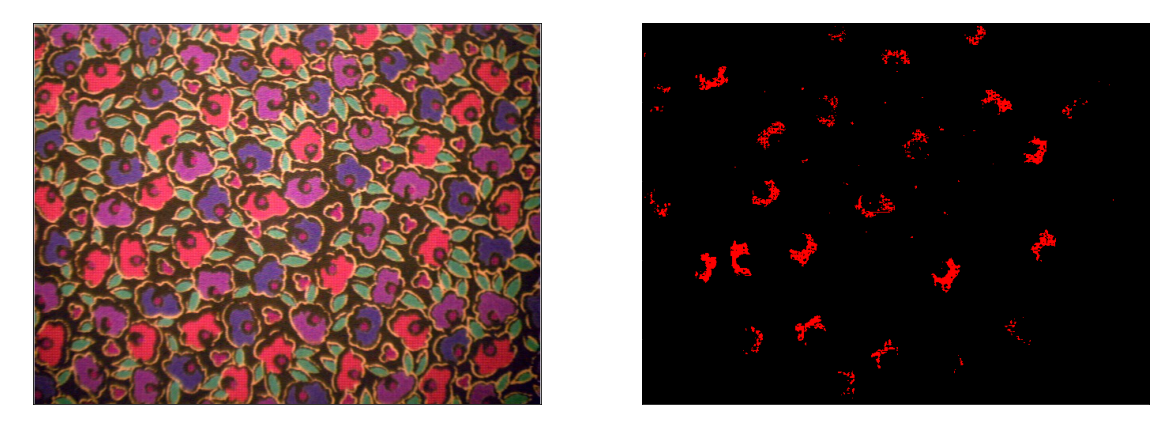

In [131]:
image = io.imread("imgs/Fabric.jpg")
lab_image = color.rgb2lab(image)

plt.figure(figsize=(20,15))

rgb_image_red = np.zeros((image.shape[0], image.shape[1], 3))
rgb_image_red[:,:,0] = lab_image[:,:,1] > 0.89 * np.max(lab_image[:,:,1])
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(rgb_image_red)
plt.title("Cervene")


Text(0.5, 1.0, 'Zelene')

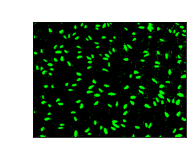

In [132]:
rgb_image_green = np.zeros((image.shape[0], image.shape[1], 3))
rgb_image_green[:,:,1] = lab_image[:,:,1] < 0.0005 * np.max(lab_image[:,:,1])
plt.subplot(1,2,2)
plt.imshow(rgb_image_green)
plt.title("Zelene")

Text(0.5, 1.0, 'Zlte')

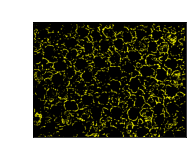

In [133]:
rgb_image_yellow = np.zeros((image.shape[0], image.shape[1], 3))
rgb_image_yellow[:,:,0] = lab_image[:,:,2] > 0.55 * np.max(lab_image[:,:,2])
rgb_image_yellow[:,:,1] = rgb_image_yellow[:,:,0]
plt.subplot(1,2,2)
plt.imshow(rgb_image_yellow)
plt.title("Zlte")